In [641]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [642]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [643]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No Any Null Data Is Present In Datasets.

In [644]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [645]:
numeric_features=[features for features in df.columns if df[features].dtype!='O']
print("Length Of Numeric_Features",len(numeric_features))
numeric_features

Length Of Numeric_Features 26


['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [646]:
categorical_features=[features for features in df.columns if df[features].dtype=='O']
print("Length Of Categorical Features",len(categorical_features))
categorical_features

Length Of Categorical Features 9


['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [647]:
year_features=[features for features in numeric_features if 'Year' in features or 'year' in features]
print("Length Of Year_Features",len(year_features))
year_features

Length Of Year_Features 6


['TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [648]:
discreat_features=[features for features in numeric_features if len(df[features].unique())<25 and features not in year_features]
print("Length Of Discreat_Features",len(discreat_features))
discreat_features

Length Of Discreat_Features 13


['Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'WorkLifeBalance']

In [649]:
continues_features=[features for features in numeric_features if len(df[features].unique())>25 and features not in year_features]
print("Length Of Continues_features",len(continues_features))
continues_features

Length Of Continues_features 7


['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate']

# Visualisation

Binary Analysis

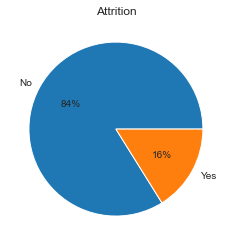

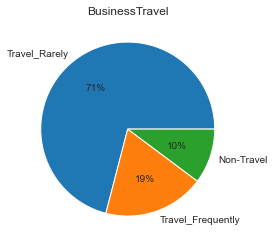

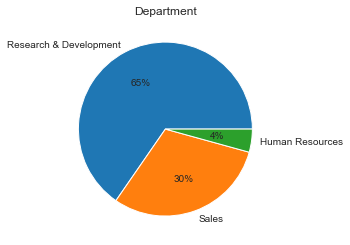

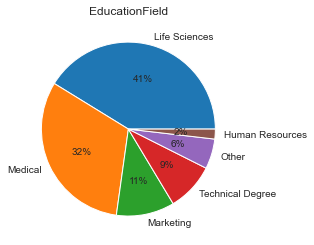

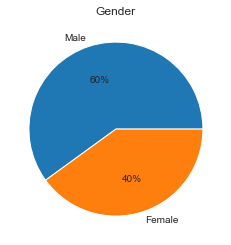

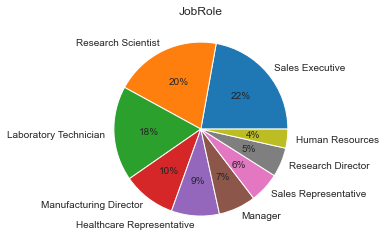

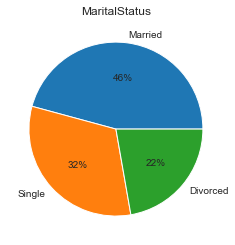

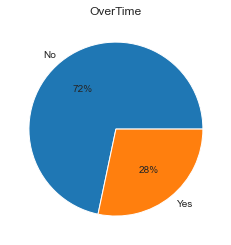

In [736]:
for i in categorical_features1:
    sns.set_style('whitegrid')
    plt.figure()
    plt.pie(df[i].value_counts(),labels=df[i].value_counts().index,autopct = '%1.0f%%' )
    plt.title(i)
    plt.show()

From This Graph We Conclude that:

1) Most of The Employee are travell rarely.

2) employee from the Research&Development are maximun and minimun from HR.this shows company focus on more Research. 

3) Most Employee are Life Science education background and after that medical and HR is less.

4) Male Cannidate are more than female.

5) Married employee are high than single and divorced.

6) All the employees are over18 in age.

7) Most employee are not prefering Overtime.

Univerian Analysis

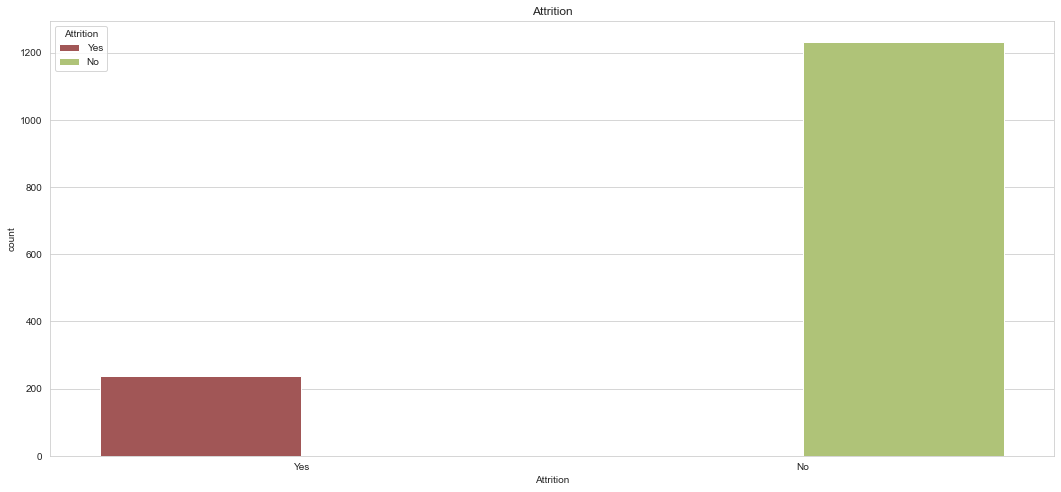

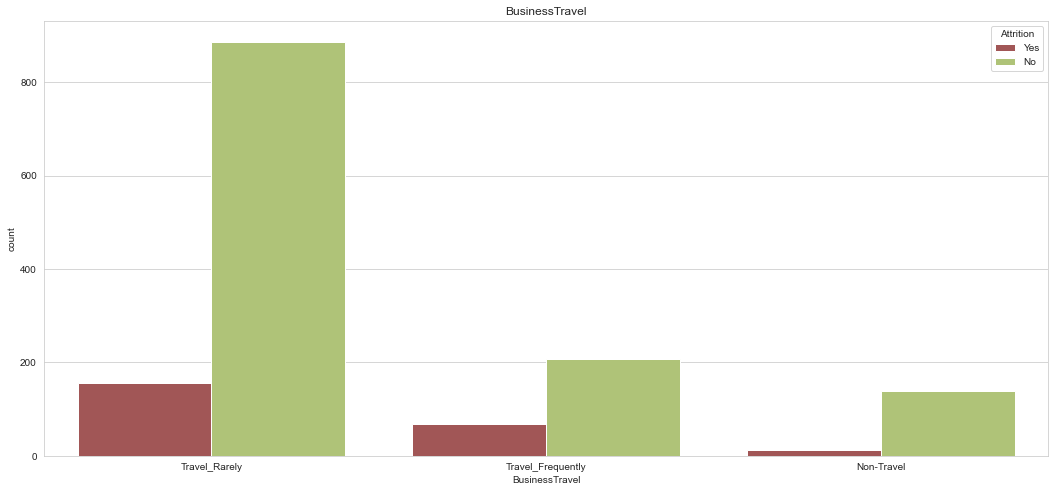

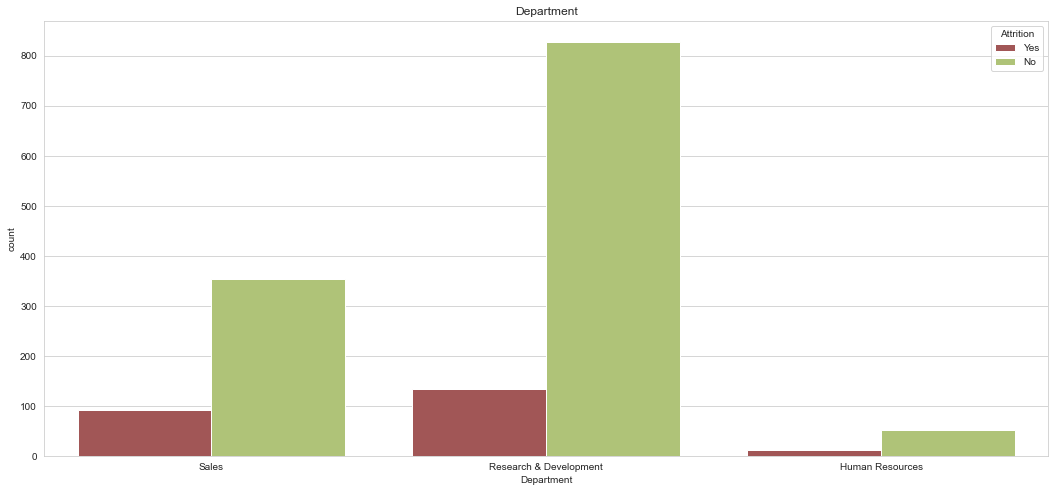

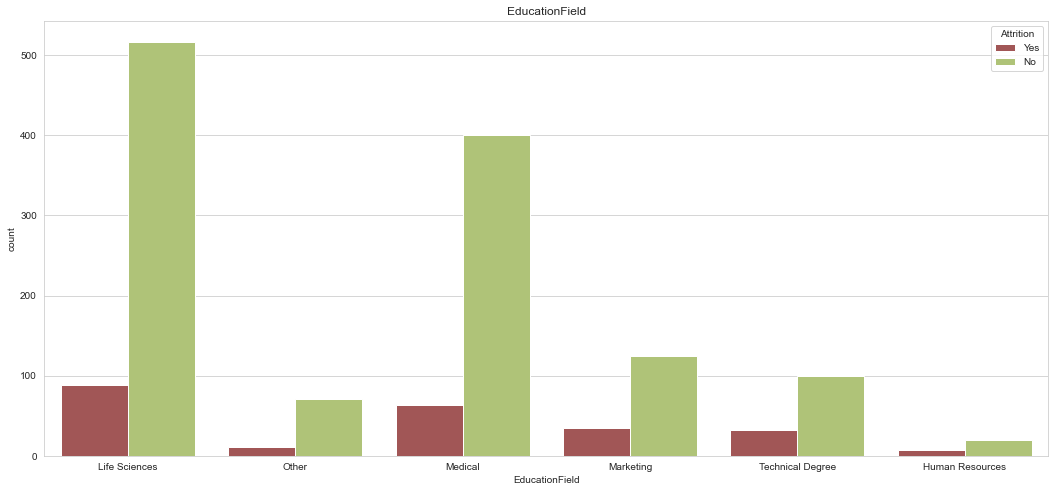

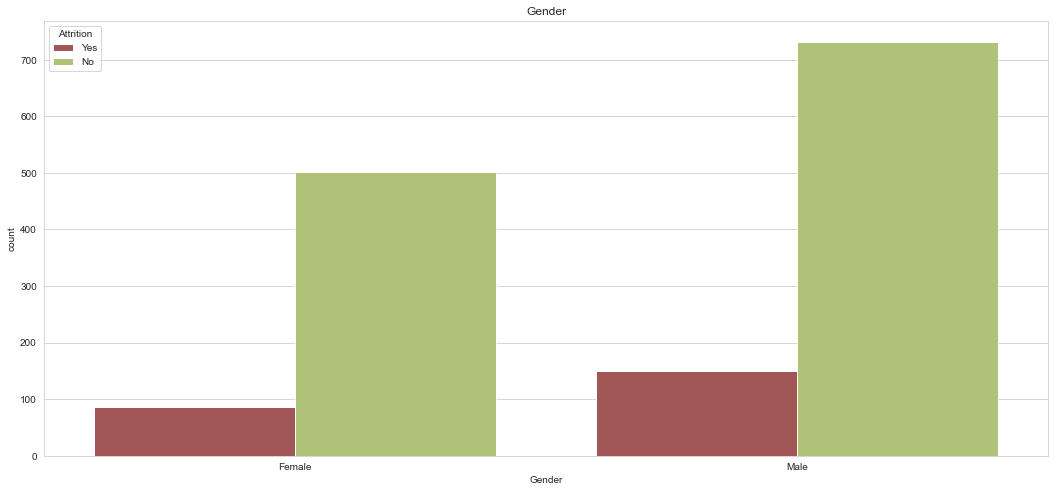

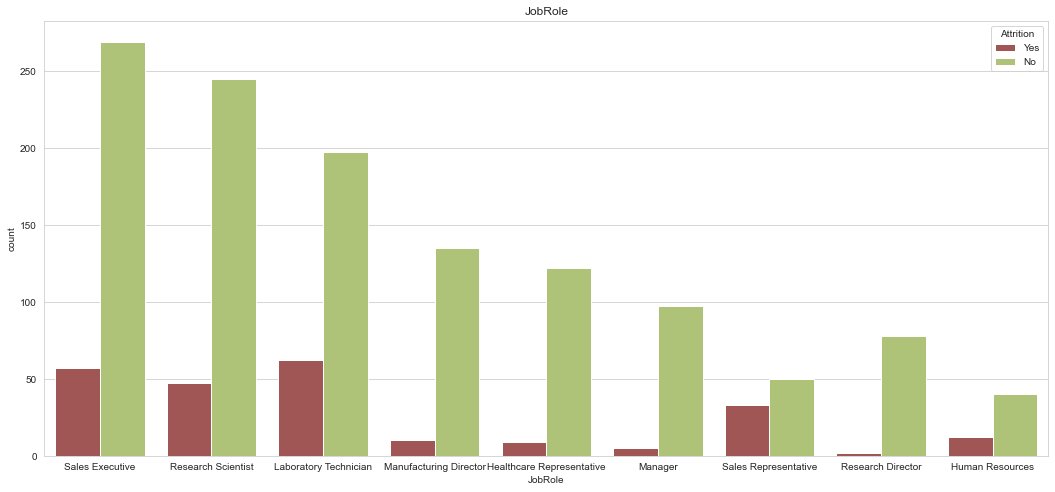

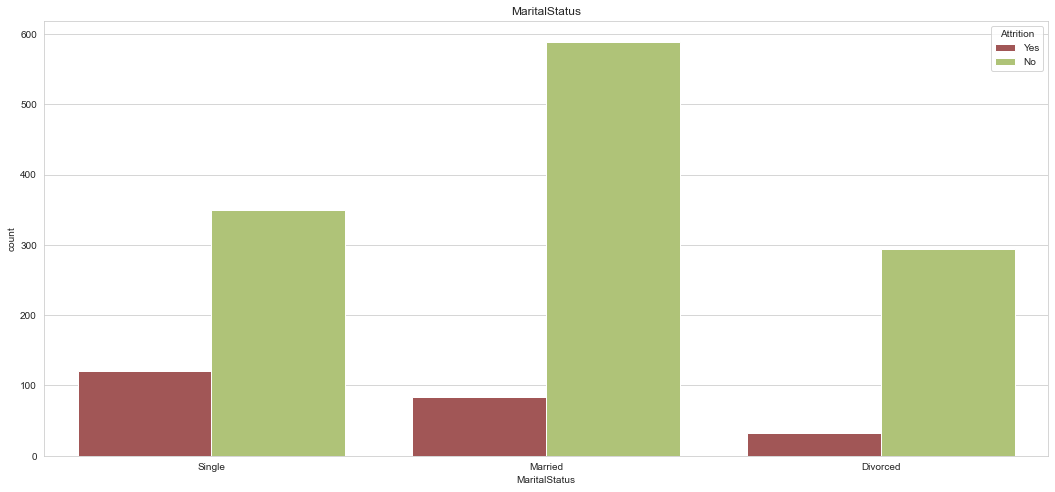

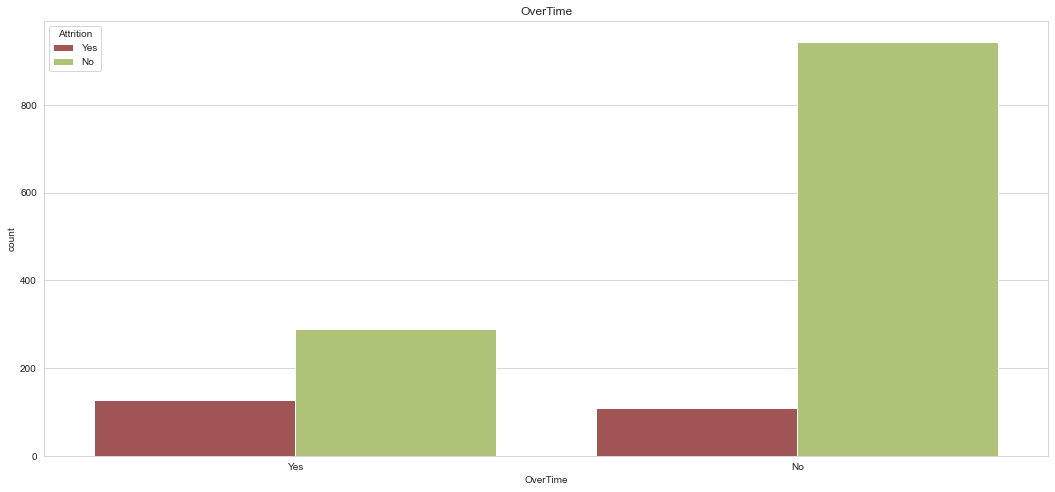

In [732]:
for i in categorical_features1:
    sns.set_style('whitegrid')
    plt.figure(figsize=(18,8))
    plt.figure
    plt.title(i)
    sns.countplot(df[i],hue=df['Attrition'],data=df,palette='tab20b_r')
    plt.show()
   

From above chart we see that Sales Excutive ,Research Scientiest,Laboratory Technician and Sales Representative having high job leaving. so we have to anaylysis that what is reason behind that.

<Figure size 1440x576 with 0 Axes>

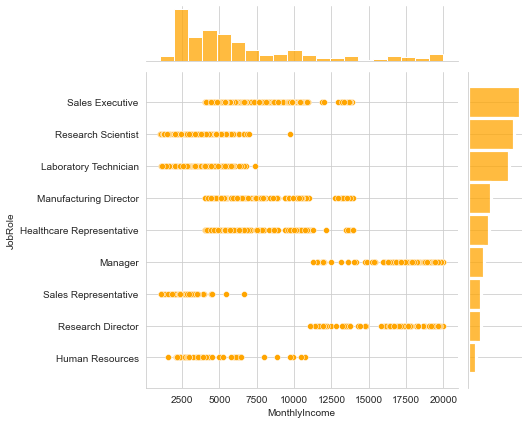

In [733]:
plt.figure(figsize=(20,8))
sns.jointplot(y=df['JobRole'],x=df['MonthlyIncome'],data=df,color='orange')

we clearly see that Monthly income of Lab.Technician ,sales representative nd research scientist are very low.it may be the one reason behind the job leaving.

# We Convert all continues features into the range/interval for better understanding.

Text(0.5, 1.0, 'Age vs Attrition')

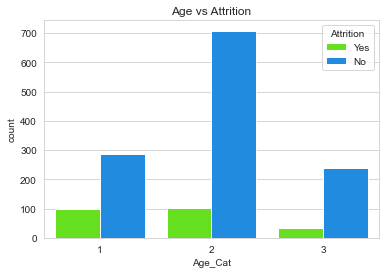

In [747]:
interval1=(15,30,45,60)
categories1=(1,2,3)
df['Age_Cat']=pd.cut(df.Age,interval1,labels=categories1)
sns.countplot(x=df['Age_Cat'],data=df,hue=df['Attrition'],palette='gist_rainbow')
sns.set_style('whitegrid')
plt.title('Age vs Attrition')

Text(0.5, 1.0, 'DailyRate vs Attrition')

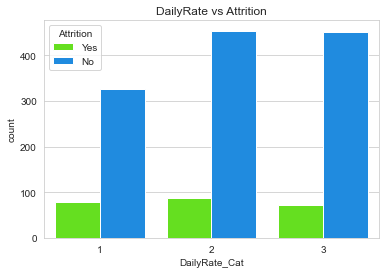

In [746]:
interval2=(0,500,1000,1500)
categories2=[1,2,3]
df['DailyRate_Cat']=pd.cut(df.DailyRate,interval2,labels=categories2)
sns.countplot(x=df['DailyRate_Cat'],data=df,hue=df['Attrition'],palette='gist_rainbow')
sns.set_style('whitegrid')
plt.title('DailyRate vs Attrition')

Text(0.5, 1.0, 'DistanceFromHome vs Attrition')

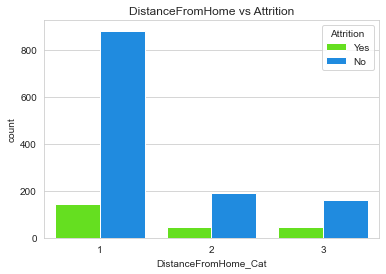

In [745]:
interval3=(0,10,20,30)
categories3=(1,2,3)
df['DistanceFromHome_Cat']=pd.cut(df.DistanceFromHome,interval3,labels=categories3)
sns.countplot(x=df['DistanceFromHome_Cat'],data=df,hue=df['Attrition'],palette='gist_rainbow')
sns.set_style('whitegrid')
plt.title("DistanceFromHome vs Attrition")

Text(0.5, 1.0, 'MonthlyRate vs Attrition')

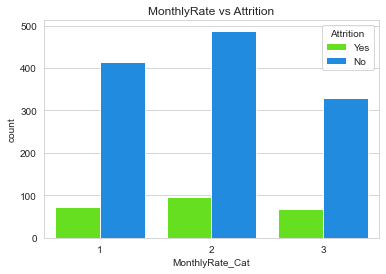

In [744]:
interval4=(0,10000,20000,30000)
categories4=(1,2,3)
df['MonthlyRate_Cat']=pd.cut(df.MonthlyRate,interval4,labels=categories4)
sns.countplot(x=df['MonthlyRate_Cat'],data=df,hue=df['Attrition'],palette='gist_rainbow')
sns.set_style('whitegrid')
plt.title("MonthlyRate vs Attrition")

Text(0.5, 1.0, 'MonthlyIncome vs Attrition')

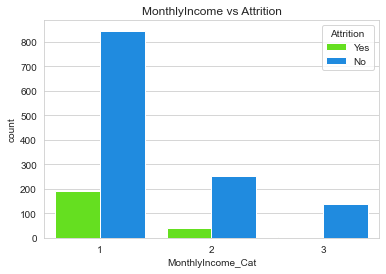

In [748]:
interval5=(0,7000,14000,21000)
categories5=(1,2,3)
df['MonthlyIncome_Cat']=pd.cut(df.MonthlyIncome,interval5,labels=categories5)
sns.countplot(x=df['MonthlyIncome_Cat'],data=df,hue=df['Attrition'],palette='gist_rainbow')
sns.set_style('whitegrid')
plt.title('MonthlyIncome vs Attrition')

Text(0.5, 1.0, 'HourlyRate vs Attrition')

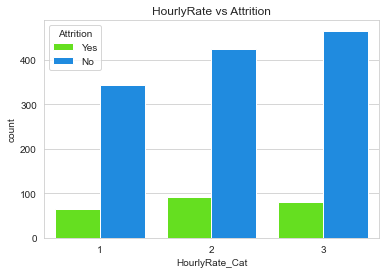

In [749]:
interval6=(25,50,75,100)
categories6=(1,2,3)
df['HourlyRate_Cat']=pd.cut(df.HourlyRate,interval6,labels=categories6)
sns.countplot(x=df['HourlyRate_Cat'],data=df,hue=df['Attrition'],palette='gist_rainbow')
sns.set_style('whitegrid')
plt.title('HourlyRate vs Attrition')

In [578]:
interval7=(10,15,20,25)
categories7=(1,2,3)
df['PercentSalaryHike']=pd.cut(df.PercentSalaryHike,interval7,labels=categories7)

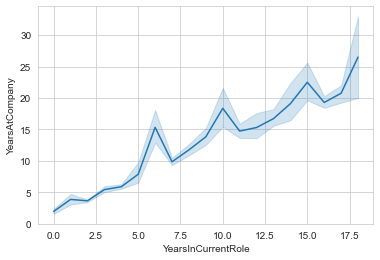

In [752]:
sns.lineplot(y='YearsAtCompany',x='YearsInCurrentRole',data=df,palette='copper_r')
sns.set_style('whitegrid')

This also shows linear relation with eachother.

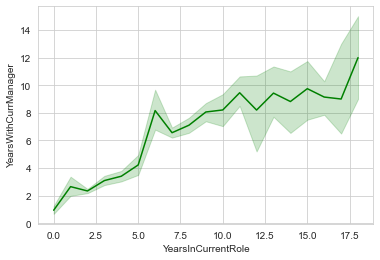

In [580]:
sns.lineplot(y='YearsWithCurrManager',x='YearsInCurrentRole',data=df,color='green')
sns.set_style('whitegrid')

YearsWithCurrManager & YearInCurrentRole are in linear 

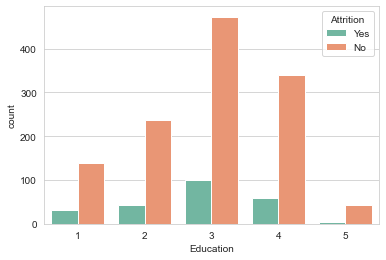

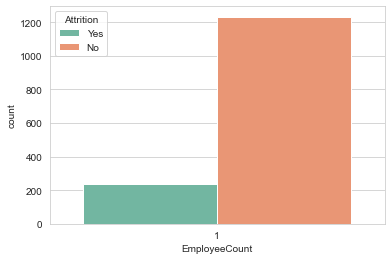

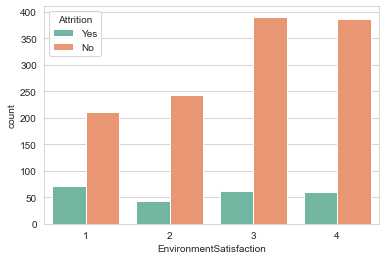

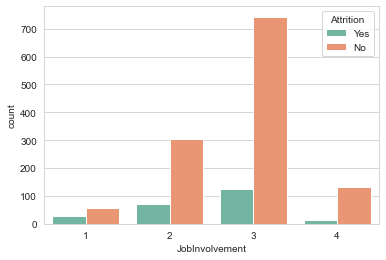

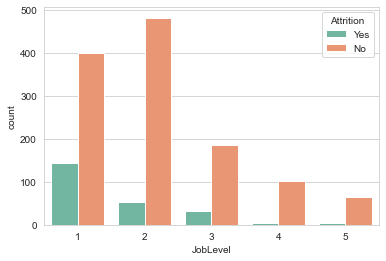

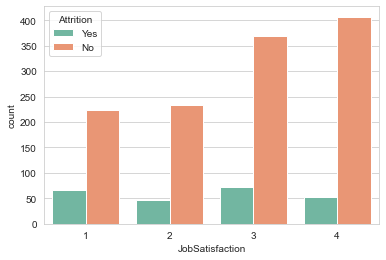

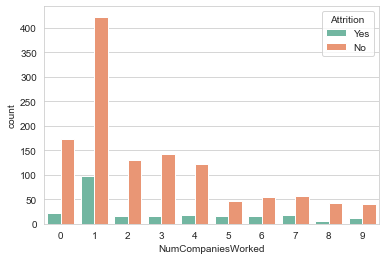

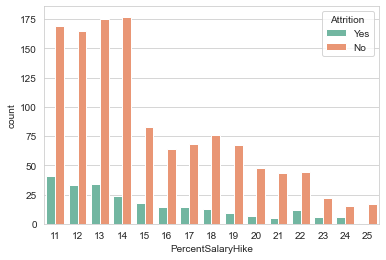

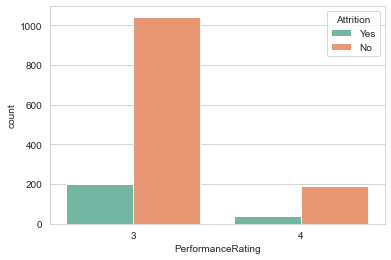

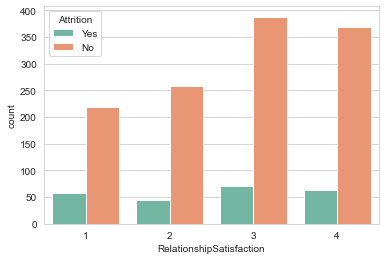

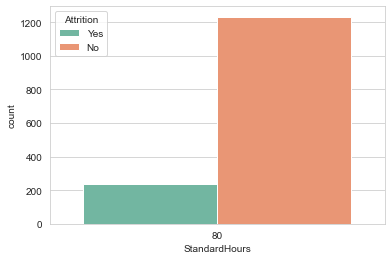

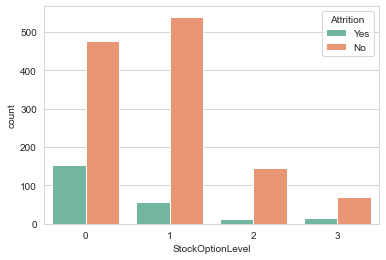

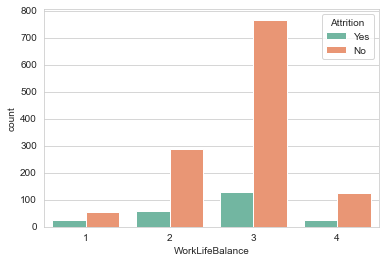

In [726]:
for i in discreat_features:
    plt.figure()
    sns.countplot(df[i],hue='Attrition',data=df,palette='Set2')
    sns.set_style('whitegrid')

We come to analysis that:-

1)Most Employee are having 3 & 4 level education.

2)Employee having jobinvolment 2 & 3 are high.

3)This chart show low level job is high and high lavel job is low.

4)This shows most employess worked only in one company which shows employee are stisfy with company.

5)Most of Employee having salary hike in range 11-15 and fews are more than 20.max hike is 25% and min hike is 11%

<Figure size 432x288 with 0 Axes>

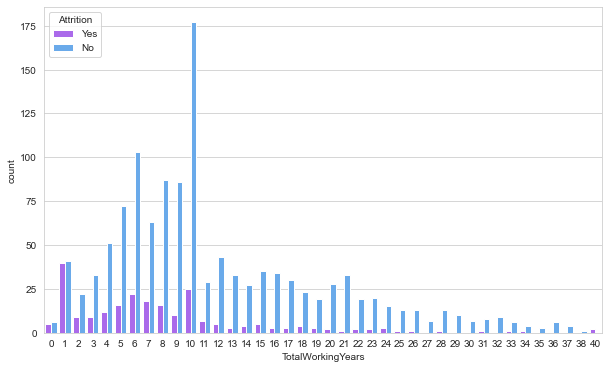

<Figure size 432x288 with 0 Axes>

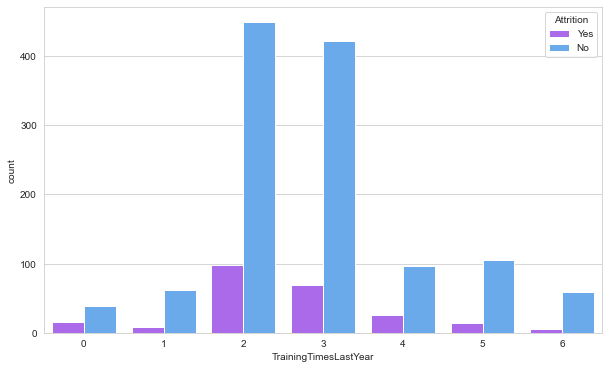

<Figure size 432x288 with 0 Axes>

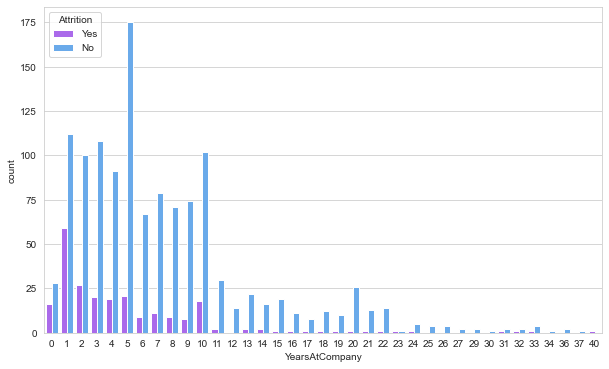

<Figure size 432x288 with 0 Axes>

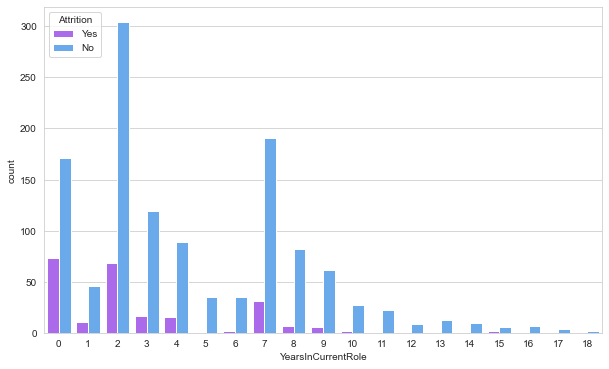

<Figure size 432x288 with 0 Axes>

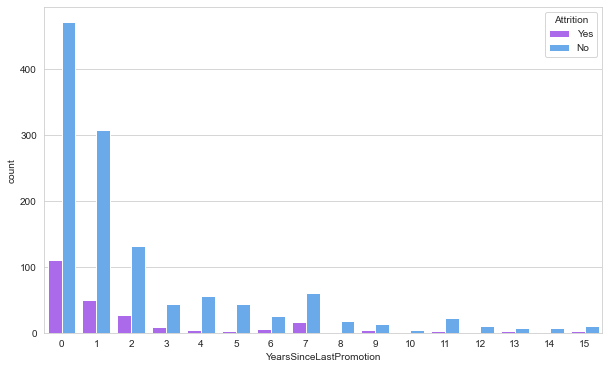

<Figure size 432x288 with 0 Axes>

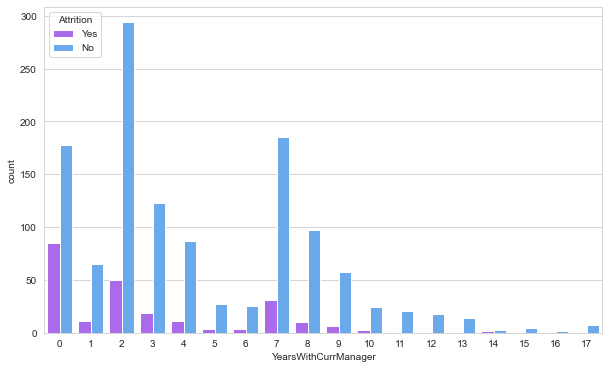

In [724]:
for i in year_features:
    plt.figure()
    plt.figure(figsize=(10,6))
    sns.set_style("whitegrid")
    sns.countplot(df[i],hue='Attrition',data=df,palette='cool_r')

# From This All Visualisation part we conclude that:-

Profile that leave the company are like:
    
1)young

2)Lower Income

3)Working with Over Time

4)Single

5)Working With Company with 1years

6)Performing rating are low

7)Lower SalaryHike

8)Stock Optionlevel is 0

9)Sales Excutive,Research Scientise and Lab Technician are leaving job

10)Job level are low(1)

# Encoding

In [583]:
from sklearn.preprocessing import LabelEncoder

In [584]:
lb=LabelEncoder()

In [585]:
for i in categorical_features:
    df[i]=lb.fit_transform(df[i])

In [586]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Cat,DailyRate_Cat,DistanceFromHome_Cat,MonthlyRate_Cat,MonthlyIncome_Cat,HourlyRate_Cat
0,41,1,2,1102,2,1,2,1,1,1,...,6,4,0,5,2,3,1,2,1,3
1,49,0,1,279,1,8,1,1,1,2,...,10,7,1,7,3,1,1,3,1,2
2,37,1,2,1373,1,2,2,4,1,4,...,0,0,0,0,2,3,1,1,1,3
3,33,0,1,1392,1,3,4,1,1,5,...,8,7,3,0,2,3,1,3,1,2
4,27,0,2,591,1,2,1,3,1,7,...,2,2,2,2,1,2,1,2,1,1


# Statastical

In [587]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [588]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   int32   
 2   BusinessTravel            1470 non-null   int32   
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   int32   
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   int32   
 8   EmployeeCount             1470 non-null   int64   
 9   EmployeeNumber            1470 non-null   int64   
 10  EnvironmentSatisfaction   1470 non-null   int64   
 11  Gender                    1470 non-null   int32   
 12  HourlyRate                1470 non-null   int64   
 13  JobInvolvement            1470 non-null   int64 

<AxesSubplot:>

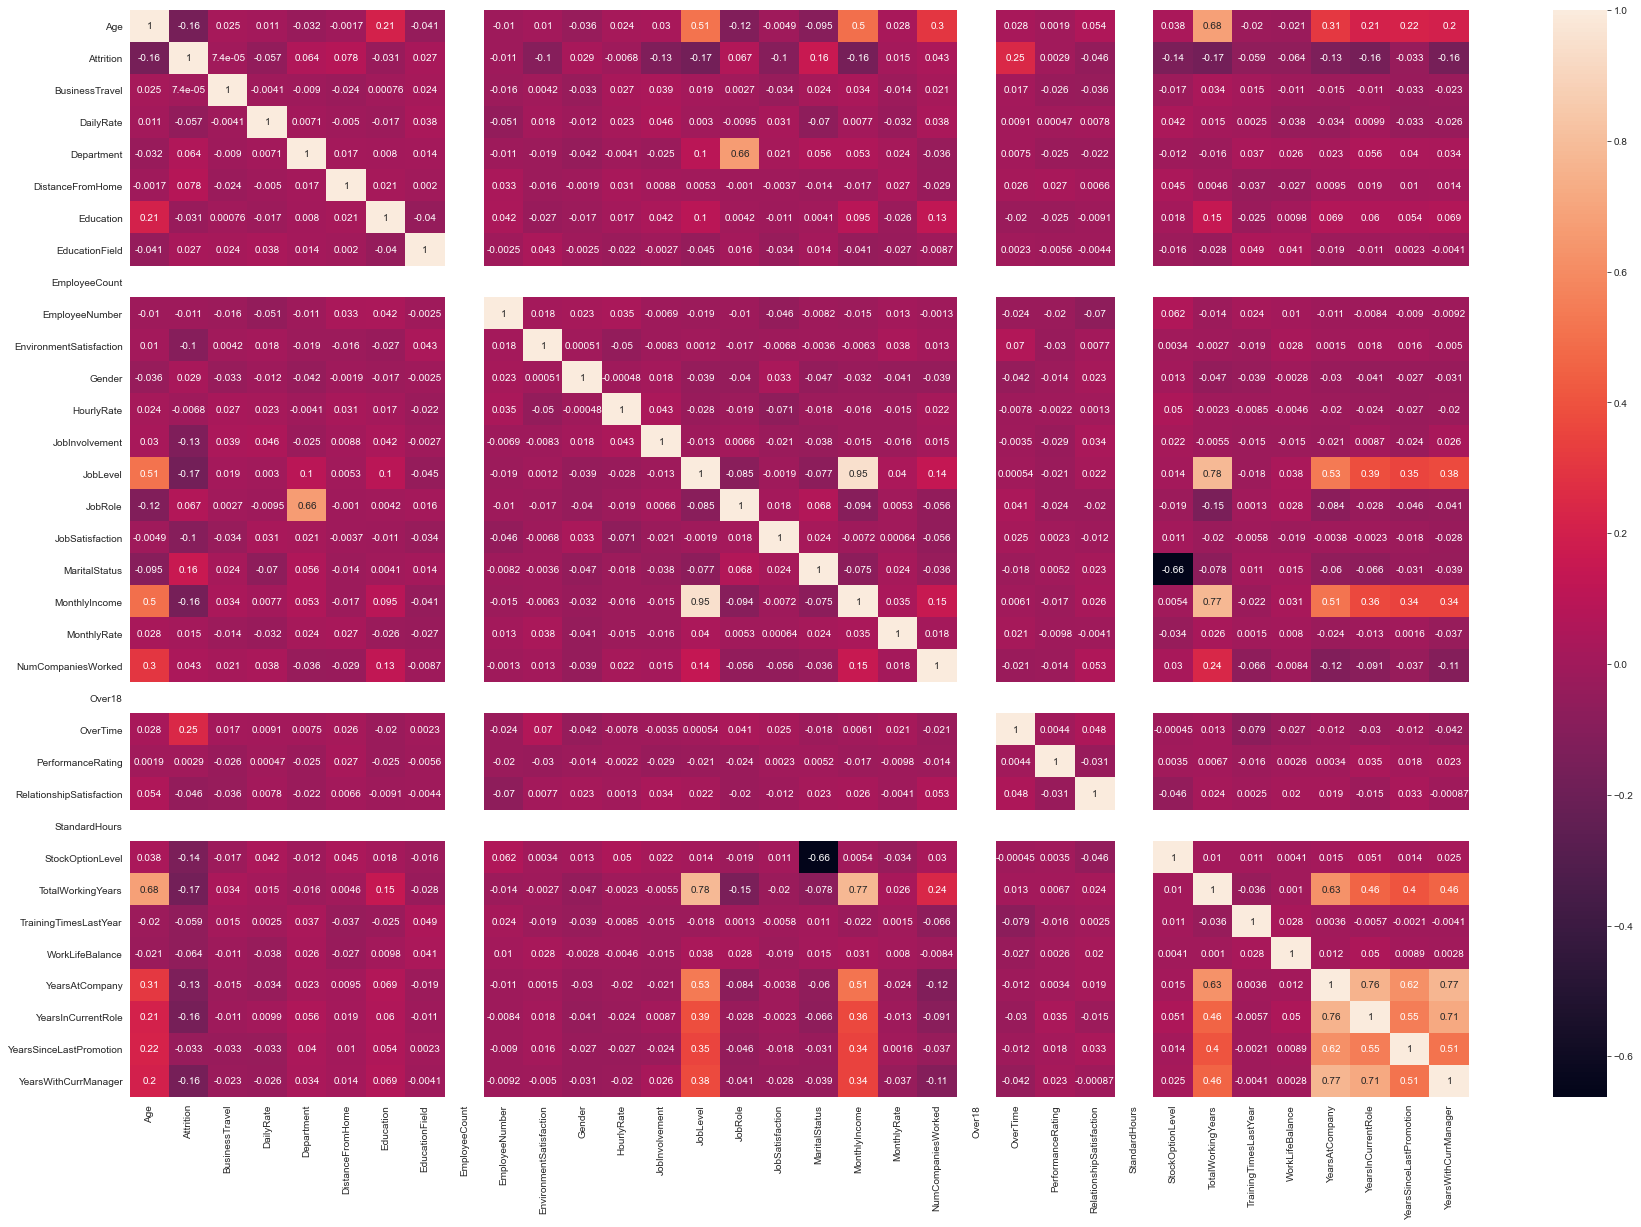

In [589]:
corr=df.corr()
plt.figure(figsize=(30,20))
sns.heatmap(data=corr,annot=True)

Material Statue and Overtime has highest positive relation with Attritions

Job Level,Yearwithcurrentmanager,Job Involment having highest negative relation with Attritions.

YearsatCurrentCompany and Yearsatcurrent role are very corelated with eachother.

# Data Cleaning

As We Convert All Continues Features in to Categorical so we drop that columns

EmployeeCount,Over18 and EmployeeNumber represent same thing in all data so we drop them.

YearsAtCompany and YearsAtCurrentrole are lineary coreleated so we drop YearsAtCompany.

In [590]:
df=df.drop(['Age','DailyRate','DistanceFromHome','EmployeeNumber','HourlyRate','MonthlyIncome','MonthlyRate','EmployeeCount','Over18','YearsAtCompany'],axis=1)

In [591]:
df.shape

(1470, 31)

Now All Our Features are category type so no need to remove any outliers.

In [592]:
df.skew()

Attrition                   1.844366
BusinessTravel             -1.439006
Department                  0.172231
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
NumCompaniesWorked          1.026471
OverTime                    0.964489
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [593]:
df['PerformanceRating']=np.sqrt(df['PerformanceRating'])
df['YearsSinceLastPromotion']=np.sqrt(df['YearsSinceLastPromotion'])
df['YearsWithCurrManager']=np.sqrt(df['YearsWithCurrManager'])
df['OverTime']=np.sqrt(df['OverTime'])
df['YearsInCurrennRole']=np.sqrt(df['YearsInCurrentRole'])

In [594]:
x=df.drop('Attrition',axis=1)
x.shape

(1470, 31)

In [595]:
y=df['Attrition']

In [596]:
x

,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Cat,DailyRate_Cat,DistanceFromHome_Cat,MonthlyRate_Cat,MonthlyIncome_Cat,HourlyRate_Cat,YearsInCurrennRole
0,2,2,2,1,2,0,3,2,7,4,...,4,0.000000,2.236068,2,3,1,2,1,3,2.000000
1,1,1,1,1,3,1,2,2,6,2,...,7,1.000000,2.645751,3,1,1,3,1,2,2.645751
2,2,1,2,4,4,1,2,1,2,3,...,0,0.000000,0.000000,2,3,1,1,1,3,0.000000
3,1,1,4,1,4,0,3,1,6,3,...,7,1.732051,0.000000,2,3,1,3,1,2,2.645751
4,2,1,1,3,1,1,3,1,2,2,...,2,1.414214,1.414214,1,2,1,2,1,1,1.414214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,1,2,3,3,1,4,2,2,4,...,2,0.000000,1.732051,2,2,3,2,1,1,1.414214
1466,2,1,1,3,4,1,2,3,0,1,...,7,1.000000,2.645751,2,2,1,3,2,1,2.645751
1467,2,1,3,1,2,1,4,2,4,2,...,2,0.000000,1.732051,1,1,1,1,1,3,1.414214
1468,1,2,3,3,4,1,2,2,7,2,...,6,0.000000,2.828427,3,3,1,2,1,2,2.449490


In [597]:
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

# SMAOTE

In [598]:
from imblearn.over_sampling import SMOTE

In [599]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)

In [600]:
trainy.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

# Random State Selection

In [601]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [602]:
lg=LogisticRegression()

In [603]:
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lg.fit(x_train,y_train)
    pred_train=lg.predict(x_train) 
    pred_test=lg.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,2)==round(accuracy_score(y_test,pred_test)*100,2):
        print('Random state',i,'score is well')
        print('test score',accuracy_score(y_test,pred_test)*100)
        print('train score',accuracy_score(y_train,pred_train)*100)
    

Random state 17 score is well
test score 87.07482993197279
train score 87.07482993197279
Random state 29 score is well
test score 87.41496598639455
train score 87.41496598639455


In [604]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=81,test_size=0.20)

In [605]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Accuracy Score:',accuracy_score(y_test,pred))
    print("Confusion Matric\n",confusion_matrix(y_test,pred))
    print('Classification Report',classification_report(y_test,pred))
    print("F1 score",f1_score(y_test,pred))

In [606]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [607]:
svc=SVC()
svcl=SVC(kernel='linear')
svcp=SVC(kernel='poly')
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

In [608]:
fun(lg)

Accuracy Score: 0.8741496598639455
Confusion Matric
 [[243   4]
 [ 33  14]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.98      0.93       247
           1       0.78      0.30      0.43        47

    accuracy                           0.87       294
   macro avg       0.83      0.64      0.68       294
weighted avg       0.86      0.87      0.85       294

F1 score 0.43076923076923074


In [609]:
fun(svc)

Accuracy Score: 0.8401360544217688
Confusion Matric
 [[247   0]
 [ 47   0]]
Classification Report               precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

F1 score 0.0


In [610]:
fun(svcl)

Accuracy Score: 0.8775510204081632
Confusion Matric
 [[245   2]
 [ 34  13]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.99      0.93       247
           1       0.87      0.28      0.42        47

    accuracy                           0.88       294
   macro avg       0.87      0.63      0.68       294
weighted avg       0.88      0.88      0.85       294

F1 score 0.4193548387096774


In [611]:
fun(svcp)

Accuracy Score: 0.8401360544217688
Confusion Matric
 [[247   0]
 [ 47   0]]
Classification Report               precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

F1 score 0.0


In [612]:
fun(dtc)

Accuracy Score: 0.7925170068027211
Confusion Matric
 [[219  28]
 [ 33  14]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.89      0.88       247
           1       0.33      0.30      0.31        47

    accuracy                           0.79       294
   macro avg       0.60      0.59      0.60       294
weighted avg       0.78      0.79      0.79       294

F1 score 0.3146067415730337


In [613]:
fun(knn)

Accuracy Score: 0.8537414965986394
Confusion Matric
 [[243   4]
 [ 39   8]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.98      0.92       247
           1       0.67      0.17      0.27        47

    accuracy                           0.85       294
   macro avg       0.76      0.58      0.59       294
weighted avg       0.83      0.85      0.82       294

F1 score 0.2711864406779661


# Ensemble Method

In [614]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [615]:
rfc=RandomForestClassifier()
adc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()

In [616]:
fun(rfc)

Accuracy Score: 0.8571428571428571
Confusion Matric
 [[246   1]
 [ 41   6]]
Classification Report               precision    recall  f1-score   support

           0       0.86      1.00      0.92       247
           1       0.86      0.13      0.22        47

    accuracy                           0.86       294
   macro avg       0.86      0.56      0.57       294
weighted avg       0.86      0.86      0.81       294

F1 score 0.2222222222222222


In [617]:
fun(adc)

Accuracy Score: 0.9115646258503401
Confusion Matric
 [[240   7]
 [ 19  28]]
Classification Report               precision    recall  f1-score   support

           0       0.93      0.97      0.95       247
           1       0.80      0.60      0.68        47

    accuracy                           0.91       294
   macro avg       0.86      0.78      0.82       294
weighted avg       0.91      0.91      0.91       294

F1 score 0.6829268292682927


In [618]:
fun(gbc)

Accuracy Score: 0.8877551020408163
Confusion Matric
 [[243   4]
 [ 29  18]]
Classification Report               precision    recall  f1-score   support

           0       0.89      0.98      0.94       247
           1       0.82      0.38      0.52        47

    accuracy                           0.89       294
   macro avg       0.86      0.68      0.73       294
weighted avg       0.88      0.89      0.87       294

F1 score 0.5217391304347826


# Hyper Tuning For Best Score

In [619]:
p2={'n_estimators':[10,50,75,25,100,250,500],'learning_rate':[0.1,0.01,10,50,100,1],'random_state':[1,10,25,81,50,100]}

In [620]:
g2=GridSearchCV(adc,p2)
g2.fit(x,y)
print(g2.best_params_)

{'learning_rate': 1, 'n_estimators': 50, 'random_state': 1}


In [636]:
adc2=AdaBoostClassifier(learning_rate=1,n_estimators=50,random_state=1)

In [621]:
adc1=AdaBoostClassifier(learning_rate=1,n_estimators=500,random_state=1)

In [622]:
fun(adc1)

Accuracy Score: 0.9149659863945578
Confusion Matric
 [[238   9]
 [ 16  31]]
Classification Report               precision    recall  f1-score   support

           0       0.94      0.96      0.95       247
           1       0.78      0.66      0.71        47

    accuracy                           0.91       294
   macro avg       0.86      0.81      0.83       294
weighted avg       0.91      0.91      0.91       294

F1 score 0.7126436781609196


In [623]:
from sklearn.model_selection import cross_val_score

# Cross Validation

In [624]:
for i in range(2,11):
    score=cross_val_score(adc,x,y,cv=i)
    print('At Value of CV=',i,score.mean())

At Value of CV= 2 0.8768707482993197
At Value of CV= 3 0.8727891156462585
At Value of CV= 4 0.8768732970027248
At Value of CV= 5 0.8877551020408163
At Value of CV= 6 0.8843537414965987
At Value of CV= 7 0.8755102040816326
At Value of CV= 8 0.8816598360655739
At Value of CV= 9 0.8809292234026634
At Value of CV= 10 0.8863945578231294


At CV=10 we get best score.

In [625]:
for i in range(2,10):
    score=cross_val_score(rfc,x,y,cv=i)
    print('At Value of CV=',i,score.mean())

At Value of CV= 2 0.8523809523809524
At Value of CV= 3 0.8530612244897959
At Value of CV= 4 0.8557820459661177
At Value of CV= 5 0.8598639455782312
At Value of CV= 6 0.8503401360544216
At Value of CV= 7 0.8557823129251699
At Value of CV= 8 0.8551058743169399
At Value of CV= 9 0.8510191697008994


In [626]:
for i in range(2,10):
    score=cross_val_score(gbc,x,y,cv=i)
    print('At Value of CV=',i,score.mean())

At Value of CV= 2 0.8551020408163266
At Value of CV= 3 0.8700680272108844
At Value of CV= 4 0.8666682709394621
At Value of CV= 5 0.8721088435374149
At Value of CV= 6 0.8653061224489796
At Value of CV= 7 0.8707482993197279
At Value of CV= 8 0.864631593014968
At Value of CV= 9 0.8693825128435333


In [627]:
for i in range(2,10):
    score=cross_val_score(lg,x,y,cv=i)
    print('At Value of CV=',i,score.mean())

At Value of CV= 2 0.8666666666666667
At Value of CV= 3 0.8659863945578231
At Value of CV= 4 0.8680251155076413
At Value of CV= 5 0.8687074829931973
At Value of CV= 6 0.8721088435374149
At Value of CV= 7 0.8714285714285713
At Value of CV= 8 0.8659977132335471
At Value of CV= 9 0.8693741998769682


# Voting Classifier

In [628]:
from sklearn.ensemble import VotingClassifier

In [629]:
estimator=[]

estimator.append(('rfc',RandomForestClassifier()))
estimator.append(('adc',AdaBoostClassifier()))
estimator.append(('gbc',GradientBoostingClassifier()))

In [630]:
vot_soft=VotingClassifier(estimators=estimator,voting='soft')
vot_soft.fit(x_train,y_train)
y_pred=vot_soft.predict(x_test)
print(y_pred)
#usint accuracy score
score=(accuracy_score(y_test,y_pred))
print('soft voting score % d'%score)

[0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
soft voting score  0


# AUC ROC Curve

In [631]:
from sklearn.metrics import roc_curve,roc_auc_score

In [632]:
y_pred_prob=adc.predict_proba(x_test)[:,1]
fpr,tpr,thersholds=roc_curve(y_test,y_pred_prob)

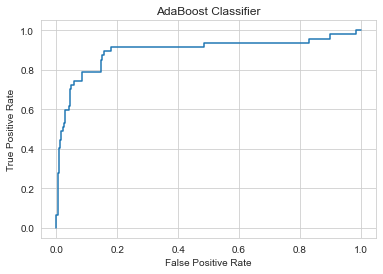

In [633]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost Classifier')
plt.show()

# Model Saving

In [634]:
import pickle
filename='Attrition_Prediction.pkl'
pickle.dump(adc,open(filename,'wb'))

In [757]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=adc.predict(x_test)

print(res)

      Actual  Predict
1451       0        0
139        0        0
1237       1        1
273        0        0
108        0        0
...      ...      ...
68         0        0
377        0        0
1380       0        0
1045       0        0
990        0        0

[294 rows x 2 columns]
